# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asymmetric Resonator Model

In [2]:
##Full fitting function used in SODETLIB
def linear_resonator(f, f_0, Q, Q_e_real, Q_e_imag):
    Q_e = Q_e_real + 1j*Q_e_imag
    return (1 - (Q * Q_e**(-1) /(1 + 2j * Q * (f - f_0) / f_0) ) )

def cable_delay(f, delay, phi, f_min):
    return np.exp(1j * (-2 * np.pi * (f - f_min) * delay + phi))

def general_cable(f, delay, phi, f_min, A_mag, A_slope):
    phase_term =  cable_delay(f,delay,phi,f_min)
    magnitude_term = ((f-f_min)*A_slope + 1)* A_mag
    return magnitude_term*phase_term
    
def resonator_cable(f, f_0, Q, Q_e_real, Q_e_imag, delay, phi, f_min, A_mag, A_slope):
    #combine above functions into our full fitting functions
    resonator_term = linear_resonator(f, f_0, Q, Q_e_real, Q_e_imag) 
    cable_term = general_cable(f, delay, phi, f_min, A_mag, A_slope)
    return cable_term*resonator_term

In [172]:
#Example parameters for making plot
f_0 = 5e9
Qi = 200e3
Q = 5e9/100e3
Q_e_real = 1/((1/Q)-(1/Qi))
Q_e_imag = 0.5*Q_e_real
delay = 50e-9
phi = np.pi/4
f_min = 4.999e9
A_mag = 0.5
A_slope = 0.01/1e6

#f_sweep = np.logspace(0,5.5,100)
fplot = np.linspace(4.9997e9,5.0003e9,100000)
#fplot = np.concatenate((5e9-np.flip(f_sweep),5e9+f_sweep))
plot_resasym = linear_resonator(fplot, f_0, Q, Q_e_real, Q_e_imag)#, delay, phi, f_min, A_mag, A_slope)
plot_rescab = resonator_cable(fplot, f_0, Q, Q_e_real, Q_e_imag, delay, phi, f_min, A_mag, A_slope)

Text(0, 0.5, '$d\\phi_{21}/df$ [Radians/Hz]')

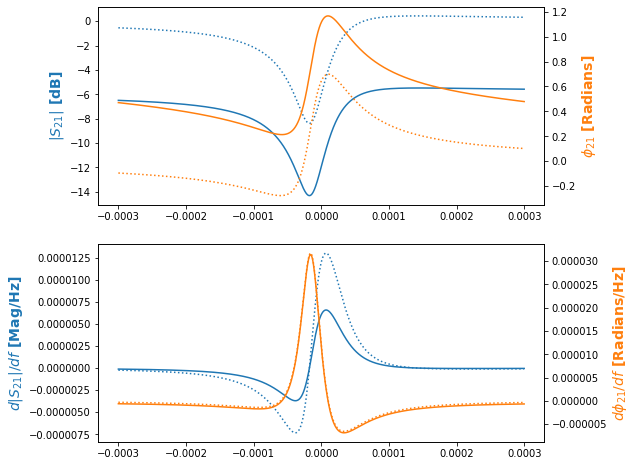

In [173]:
plt.figure(figsize = (8,8))
ax1 = plt.subplot(2,1,1)
ax1.plot((fplot-5e9)/1e9,20*np.log10(np.abs(plot_rescab)),color = 'C0')
ax1.plot((fplot-5e9)/1e9,20*np.log10(np.abs(plot_resasym)),color = 'C0',ls = ':')
ax1.set_ylabel('$|S_{21}|$ [dB]',fontsize = 14,color = 'C0',fontweight = 'bold')
ax2 = ax1.twinx()
ax2.plot((fplot-5e9)/1e9,np.angle(plot_rescab),color = 'C1')
ax2.plot((fplot-5e9)/1e9,np.angle(plot_resasym),color = 'C1',ls = ':')
ax2.set_ylabel('$\phi_{21}$ [Radians]',fontsize = 14,color = 'C1',fontweight = 'bold')
ax3 = plt.subplot(2,1,2)
ax3.plot((fplot[1:]-5e9)/1e9,np.diff(np.abs(plot_rescab))/np.diff(fplot), color = 'C0')
ax3.plot((fplot[1:]-5e9)/1e9,np.diff(np.abs(plot_resasym))/np.diff(fplot), color = 'C0',ls = ':')
ax3.set_ylabel('$d|S_{21}|/df$ [Mag/Hz]',fontsize = 14,color = 'C0',fontweight = 'bold')
ax4 = ax3.twinx()
ax4.plot((fplot[1:]-5e9)/1e9,np.diff(np.angle(plot_rescab))/np.diff(fplot), color = 'C1')
ax4.plot((fplot[1:]-5e9)/1e9,np.diff(np.angle(plot_resasym))/np.diff(fplot), color = 'C1', ls = ':')
ax4.set_ylabel('$d\phi_{21}/df$ [Radians/Hz]',fontsize = 14,color = 'C1',fontweight = 'bold')

# Symmetric Resonator Model

In [157]:
def sym_res(f,f0,Q,Qc):
    x = (f-f0)/f0
    return 1 - (Q/Qc)/(1-2j*Q*x)

In [158]:
plot_ressym = sym_res(fplot, f_0, Q, Q_e_real)

Text(0, 0.5, '$d\\phi_{21}/df$ [Radians/Hz]')

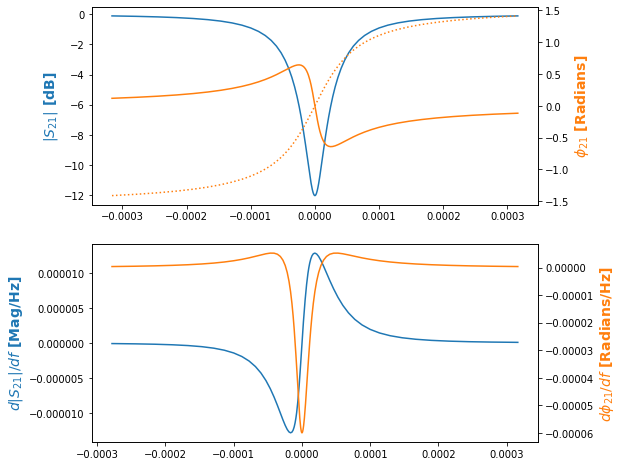

In [159]:
plt.figure(figsize = (8,8))
ax1 = plt.subplot(2,1,1)
ax1.plot((fplot-5e9)/1e9,20*np.log10(np.abs(plot_ressym)),color = 'C0')
ax1.set_ylabel('$|S_{21}|$ [dB]',fontsize = 14,color = 'C0',fontweight = 'bold')
ax2 = ax1.twinx()
ax2.plot((fplot-5e9)/1e9,np.angle(plot_ressym),color = 'C1')
ax2.plot((fplot-5e9)/1e9,np.angle(1-plot_ressym),color = 'C1',ls = ':')
ax2.set_ylabel('$\phi_{21}$ [Radians]',fontsize = 14,color = 'C1',fontweight = 'bold')
ax3 = plt.subplot(2,1,2)
ax3.plot((fplot[1:]-5e9)/1e9,np.diff(np.abs(plot_ressym))/np.diff(fplot), color = 'C0')
ax3.set_ylabel('$d|S_{21}|/df$ [Mag/Hz]',fontsize = 14,color = 'C0',fontweight = 'bold')
ax4 = ax3.twinx()
ax4.plot((fplot[1:]-5e9)/1e9,np.diff(np.angle(plot_ressym))/np.diff(fplot), color = 'C1')
ax4.set_ylabel('$d\phi_{21}/df$ [Radians/Hz]',fontsize = 14,color = 'C1',fontweight = 'bold')

# Comparing Derivatives Offset from Minimum

Text(0, 0.5, '$|d|S_{21}|/df|$ [Mag/Hz]')

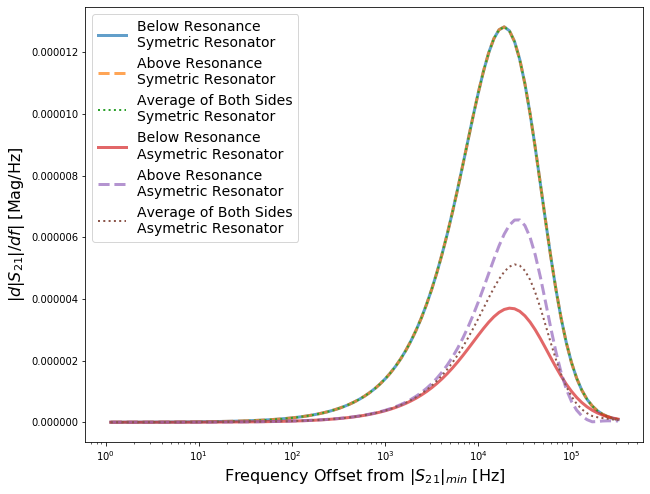

In [180]:
plt.figure(figsize = (10,8))
f_sweep = np.logspace(0,5.5,100)
fplotmin = 5e9-np.flip(f_sweep)
fplotplus = 5e9+f_sweep
plot_ressymmin = sym_res(fplotmin, f_0, Q, Q_e_real)
plot_ressymplus = sym_res(fplotplus, f_0, Q, Q_e_real)
abs_diffmin = np.diff(np.abs(plot_ressymmin))/np.diff(fplotmin)
abs_diffplus = np.diff(np.abs(plot_ressymplus))/np.diff(fplotplus)
plt.semilogx(np.flip(f_sweep[1:]),np.abs(abs_diffmin),alpha = 0.7,lw = 3,
             label = 'Below Resonance\nSymetric Resonator')
plt.semilogx(f_sweep[1:],np.abs(abs_diffplus),alpha = 0.7,ls = '--',lw = 3,
            label = 'Above Resonance\nSymetric Resonator')
plt.semilogx(f_sweep[1:],(np.flip(np.abs(abs_diffmin))+np.abs(abs_diffplus))/2,
             ls = ':',lw = 2,
            label = 'Average of Both Sides\nSymetric Resonator')

#########################
fmin_asym = fplot[np.argmin(np.abs(plot_rescab))]
fplotmin = fmin_asym-np.flip(f_sweep)
fplotplus = fmin_asym+f_sweep

plot_rescabmin = resonator_cable(fplotmin, f_0, Q, Q_e_real, Q_e_imag, delay, phi, f_min, A_mag, A_slope)
plot_rescabplus = resonator_cable(fplotplus, f_0, Q, Q_e_real, Q_e_imag, delay, phi, f_min, A_mag, A_slope)
abs_diff_asymmin = np.diff(np.abs(plot_rescabmin))/np.diff(fplotmin)
abs_diff_asymplus = np.diff(np.abs(plot_rescabplus))/np.diff(fplotplus)
plt.semilogx(np.flip(f_sweep[1:]),np.abs(abs_diff_asymmin),alpha = 0.7,lw = 3,
             label = 'Below Resonance\nAsymetric Resonator')
plt.semilogx(f_sweep[1:],np.abs(abs_diff_asymplus),alpha = 0.7,ls = '--',lw = 3,
             label = 'Above Resonance\nAsymetric Resonator')
plt.semilogx(f_sweep[1:],(np.flip(np.abs(abs_diff_asymmin))+np.abs(abs_diff_asymplus))/2,
             ls = ':',lw = 2,label = 'Average of Both Sides\nAsymetric Resonator')
plt.legend(loc = 'upper left',fontsize = 14)
plt.xlabel('Frequency Offset from $|S_{21}|_{min}$ [Hz]',fontsize = 16)
plt.ylabel('$|d|S_{21}|/df|$ [Mag/Hz]',fontsize = 16)